In [1]:
# importing all necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import email
import os
from os import walk
from os.path import join

In [2]:
# lets define constants
SPAM_CAT=1
HAM_CAT=0

SPAM_PATH='data/spam'
SPAM_PATH_2='data/spam_2'
EASY_HAM='data/easy_ham'
EASY_HAM_2='data/easy_ham2'
EMAIL_SAMPLE='sample_email.txt'

VOCAB_SIZE=2000

In [3]:
'''
looking the the email body from both the spam and ham email, the actual body of the email starts after empty line, so anything after, 
\n is the email body.
'''
f = open(EMAIL_SAMPLE, "r")
# print(f.read()) #this returns string
is_body=False
lines=[]

for line in f:
    if is_body:
        # print(line)
        lines.append(line)
    elif line=='\n':
        is_body=True

email_body='\n'.join(lines)
print(email_body)


A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 

 

  GET IN WITH THE FOUNDERS! 

The MAJOR PLAYERS are on This ONE

For ONCE be where the PlayerS are

This is YOUR Private Invitation



EXPERTS ARE CALLING THIS THE FASTEST WAY 

TO HUGE CASH FLOW EVER CONCEIVED

Leverage $1,000 into $50,000 Over and Over Again



THE QUESTION HERE IS:

YOU EITHER WANT TO BE WEALTHY 

OR YOU DON'T!!!

WHICH ONE ARE YOU?

I am tossing you a financial lifeline and for your sake I 

Hope you GRAB onto it and hold on tight For the Ride of youR life!



Testimonials



Hear what average people are doing their first few days:

ï¿½We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL

 ï¿½I'm a single mother in FL and I've received 12,000 in the last 4 days.ï¿½ D. S. in FL

ï¿½I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!ï¿½ L.L. in KY

ï¿½I didn't have the money, so I found myself a partner to work this with. We have 

In [4]:
'''
In this step what we need to do is extract email body from each of the email, an label those email body with the name of the email.
For this we will be writing the function, which will get name of all the files from the directory where our email are located and iterate over those 
emails to extract email body.
'''
def email_body_generator(path_to_file):
    for root, dirs, files in walk(path_to_file):
        for file in files:
            f = open(os.path.join(root,file), "r",encoding='latin-1')
            is_body=False
            lines=[]
        
            for line in f:
                if is_body:
                    # print(line)
                    lines.append(line)
                elif line=='\n':
                    is_body=True
            
            email_body='\n'.join(lines)
            yield file,email_body

In [5]:
def create_df_from_directory(path_to_file, category):
  rows = []
  row_names =[]
  
  for file, email_body in email_body_generator(path_to_file):
      # print(file,email_body)
    rows.append({'MESSAGE':email_body,'CATEGORY':category})
    row_names.append(file)

  return pd.DataFrame(data=rows, index=row_names)

In [6]:
create_df_from_directory('data/spam','spam')

,MESSAGE,CATEGORY
0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1,,spam
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
00004.eac8de8d759b7e74154f142194282724,##############################################...,spam
...,...,...
0498.863566df8e5f17f979edca79d1e87187,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont...",spam
0499.4a17fbd7fe71705e09b4dd2e24d802dd,"<HTML>\n\n<BODY>\n\n <tr valign=3D""top""> \n\n...",spam
0500.2e8762b67913d1b07bc8da293448d27f,UNCOMMON EXOTIC PLEASURE BOTANICALS!\n\n\n\nFe...,spam
cmds,,spam


In [7]:
# Create dataframes for spam and non spam emails
spam_emails=pd.concat([create_df_from_directory(SPAM_PATH,SPAM_CAT),create_df_from_directory(SPAM_PATH_2,SPAM_CAT)])
# create dataframe for the non spam emails
ham_emails=pd.concat([create_df_from_directory(EASY_HAM,HAM_CAT),create_df_from_directory(EASY_HAM_2,HAM_CAT)])

In [8]:
spam_emails.head()

,MESSAGE,CATEGORY
0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1,,1
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1


In [9]:
nHamEmails,nCols=ham_emails.shape
print("Total number of non-spam emails is :{}".format(nHamEmails))

Total number of non-spam emails is :5052


In [10]:
nSpamEmails,nCols=spam_emails.shape
print("Total number of spam emails is :{}".format(nHamEmails))

Total number of spam emails is :5052


In [11]:
all_emails=pd.concat([ham_emails,spam_emails])
nEmails,nCols=all_emails.shape
print("The total size data is: {}".format(nEmails))

The total size data is: 7453


### Checking for any missing values

In [12]:
all_emails.isnull().sum()

MESSAGE     0
CATEGORY    0
dtype: int64

In [13]:
# check if there is any null value in the message
all_emails['MESSAGE'].isnull().any()

False

In [14]:
# check if the message has any empty string
message=all_emails['MESSAGE']
lis=[]
for index, value in message.items():
    if len(value)==0:
        lis.append(index)

print(lis) 

['cmds', '0000.7b1b73cf36cf9dbc3d64e3f2ee2b91f1', 'cmds', 'cmds']


In [15]:
# drop all the data that are located to be empty
all_emails.drop(lis,inplace=True)

In [16]:
# size of our data after dropping rows with empty message.
all_emails.shape

(7449, 2)

In [17]:
# lets create the index or the ids for each of the emails
temp_index=[i for i in range(all_emails.shape[0])]

In [18]:
# create a new field called file name with the index in above dataframe
all_emails['FILE_NAME']=all_emails.index

In [19]:
# assign the index with the list of index: temp_index
all_emails.index=temp_index

In [20]:
# check for the data frame
all_emails.head()

,MESSAGE,CATEGORY,FILE_NAME
0,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0,00001.7c53336b37003a9286aba55d2945844c
1,"Martin A posted:\n\nTassos Papadopoulos, the G...",0,00002.9c4069e25e1ef370c078db7ee85ff9ac
2,Man Threatens Explosion In Moscow \n\n\n\nThur...,0,00003.860e3c3cee1b42ead714c5c874fe25f7
3,Klez: The Virus That Won't Die\n\n \n\nAlready...,0,00004.864220c5b6930b209cc287c361c99af1
4,"> in adding cream to spaghetti carbonara, whi...",0,00005.bf27cdeaf0b8c4647ecd61b1d09da613


In [21]:
# export datafame to json format
all_emails.to_json('data/data')

### Data Visualization

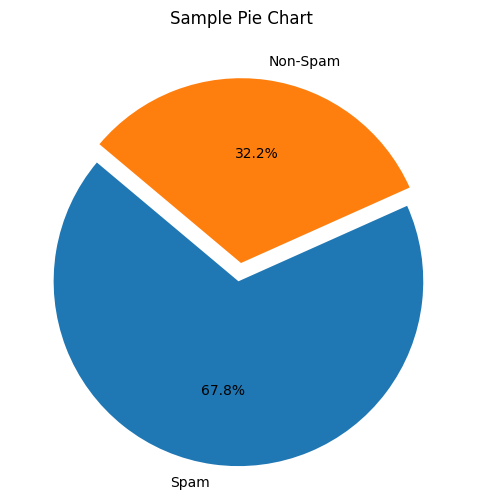

In [34]:
# check frequency distribution of spam and non spam emails
email_counts=all_emails.CATEGORY.value_counts()
labels = ['Spam','Non-Spam']
plt.figure(figsize=(8, 6))
plt.pie(email_counts,labels=labels,explode=(0.1, 0),autopct='%1.1f%%', startangle=140,shadow=False)
plt.title('Sample Pie Chart')
plt.show()